# 📌 Урок: Задачи оптимизации

## 📖 Теоретический минимум

### 🔹 Что такое задачи оптимизации?
Задачи оптимизации — это математические задачи, в которых необходимо найти **лучшее** (оптимальное) решение из множества возможных вариантов.

### 🔹 Классификация задач оптимизации
1. **По типу переменных:**
   - **Непрерывные** (значения переменных могут быть любыми, например, вещественные числа).
   - **Дискретные** (переменные могут принимать только целые значения).
   - **Комбинаторные** (переменные представляют собой комбинации элементов).

2. **По числу экстремумов:**
   - **Линейные** (функция и ограничения линейные).
   - **Нелинейные** (функция или ограничения нелинейные).
   - **Выпуклые** (гарантирован один глобальный минимум).
   - **Невыпуклые** (возможны локальные минимумы и максимумы).

3. **По числу критериев:**
   - **Однокритериальные** (оптимизируется одна функция).
   - **Многокритериальные** (оптимизируются сразу несколько критериев).

### 🔹 Методы решения задач оптимизации
- **Градиентные методы** (используют производные для поиска минимума/максимума).
- **Метод линейного программирования** (например, симплекс-метод).
- **Методы комбинаторной оптимизации** (жадные алгоритмы, динамическое программирование).
- **Эволюционные алгоритмы** (генетические алгоритмы, муравьиные алгоритмы).
- **Методы численной оптимизации** (например, метод Ньютона).

---

## 📖 Материалы

https://vk.com/video302513503_456239460

https://habr.com/ru/articles/474286/

https://vk.com/video121629816_456239397

Грокаем алгоритмы. Иллюстрированное пособие для программистов и любопытствующих от Бхаргава А.

https://docs.sympy.org/latest/index.html

---



# 🏆 Задания

За использование оптимизационных библиотек баллы попалам.

## 1️⃣ Минимизация функции одной переменной
Реализуйте метод **градиентного спуска** для минимизации функции:

\[
f(x) = x^2 + 4x + 4
\]

Найдите минимальное значение функции и точку, в которой оно достигается.

---


Минимальное значение 0.0 достигается при х равном -2.0


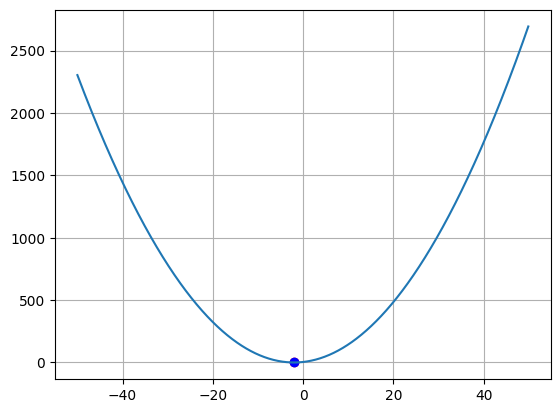

In [161]:
import time
import numpy as np
import matplotlib.pyplot as plt

n = 50  # число итераций
x0 = 0  # начальное значение
lamda = 0.1  # шаг сходимости


def f(x):
    return x**2 + 4 * x + 4


def df(x):
    return 2 * x + 4


x_plt = np.arange(-50, 50, 0.1)
f_plt = [f(x) for x in x_plt]

plt.ion()  # включение интерактивного режима отображения графиков
fig, ax = plt.subplots()  # создание окна и осей для графика
ax.grid(True)  # Отображение сетки на графике

ax.plot(x_plt, f_plt)
point = ax.scatter(x0, f(x0), c="red")

mn = 100
for i in range(n):
    lamda = 1 / (min(i + 1, mn))  # Шаг сходимости
    x0 = x0 - lamda * df(x0)
    point.set_offsets([x0, f(x0)])
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)

plt.ioff()
print(f"Минимальное значение {f(x0)} достигается при х равном {x0}")
ax.scatter(x0, f(x0), c="blue")
plt.show()


## 2️⃣ Оптимизация производства
Фабрика производит два вида товаров: **A** и **B**.  
Прибыль с одного товара A — **$5$**, с одного товара B — **$3$**.  
Ограничения:
- На производство A уходит **2 часа**, на B — **1 час**.
- Всего доступно **100 часов**.

Сколько товаров A и B нужно выпустить, чтобы максимизировать прибыль?  
Решите задачу линейного программирования с помощью **симплекс метода**.
За решение оптимизационными библиотеками 0,5 балла, за частное решение этой задачи 0,5 балла.

---



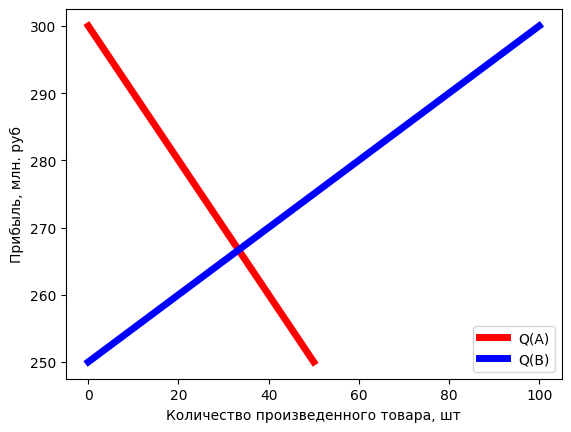

In [144]:
"""
Q = 5 * A + 3 * B -> max
T = 2 * A + B = 100
"""

import matplotlib.pyplot as plt
import numpy as np

a = np.linspace(0, 100 / 2, 50)
q_a = 5 * a + 3 * (100 - 2 * a)

b = np.linspace(0, 100, 100)
q_b = 5 * (50 - b / 2) + 3 * b

plt.figure()
plt.plot(a, q_a, "r", linewidth=5, label="Q(A)")
plt.plot(b, q_b, "b", linewidth=5, label="Q(B)")
plt.legend()
plt.xlabel("Количество произведенного товара, шт")
plt.ylabel("Прибыль, млн. руб")
plt.show()

In [4]:
from scipy.optimize import linprog

"""
Q = 5 * A + 3 * B -> max
T = 2 * A + B = 100
"""
T = 100
q_A = 5
q_B = 3
t_A = 2
t_B = 1

obj = [-q_A, -q_B]
lhs_eq = [[t_A, t_B]]
rhs_eq = [T]
bnd = [(0, float("inf")), (0, float("inf"))]  # Границы x  # Границы y
opt = linprog(
    c=obj,
    A_eq=lhs_eq,
    b_eq=rhs_eq,
    bounds=bnd,
    method="highs",
)
print(
    f"Максимальная прибыль составит: {abs(int(opt.fun))} при количестве единиц товара А: {int(opt.x[0])} и товара В: {int(opt.x[1])}"
)

Максимальная прибыль составит: 300 при количестве единиц товара А: 0 и товара В: 100


In [ ]:
# Нашел кодик на гитхабе
# Реализован симплекс-метод
def is_linear(coefficients):
    # Check if all coefficients are numbers (linear).
    return all(isinstance(c, (int, float)) for c in coefficients)


def round_value(val, accuracy):
    return round(val, accuracy)


def simplex(obj, constraints, rhs, accuracy, is_maximization):
    n = len(obj)
    m = len(constraints)

    if not is_maximization:
        obj = [-x for x in obj]

    # Building the simplex tableau
    table = [[0 for _ in range(n + 1 + m)] for _ in range(m + 1)]  # Create table

    for i in range(n):
        table[0][i] = -obj[i]  # Fill in z-row

    for i in range(1, m + 1):  # Fill in constraints coefficients
        for j in range(n):
            if j < len(constraints[i - 1]):
                table[i][j] = constraints[i - 1][j]

    table[0][-1] = 0  # RHS of z
    for i in range(1, m + 1):  # Other RHS
        table[i][-1] = rhs[i - 1]

    for i in range(1, m + 1):  # Fill in slack variables
        for j in range(n, n + m):
            if j - n == i - 1:
                table[i][j] = 1

    # Initialize basis variables
    basis = [n + i for i in range(m)]  # [n, n+1, ..., n+m-1]

    # print("Initial Simplex Tableau:")
    # print(table)

    # Initialize answers and z_value
    # Removed initial answers assignment as it will be handled after optimization
    z_value = 0  # This will store the value of the objective function

    while any(
        round_value(x, accuracy) < 0 for x in table[0][:-1]
    ):  # Exclude RHS in z-row
        key_col = -1
        min_val = float("inf")

        # Find the column to pivot on (most negative coefficient in z-row)
        for i in range(n + m):
            if round_value(table[0][i], accuracy) < round_value(min_val, accuracy):
                min_val = table[0][i]
                key_col = i

        if key_col == -1:
            print("No valid pivot column found. The method is not applicable!")
            exit()

        key_row = -1
        min_ratio = float("inf")

        # Find the row to pivot on using the minimum ratio test
        for i in range(1, m + 1):
            if round_value(table[i][key_col], accuracy) > 0:
                ratio = table[i][-1] / table[i][key_col]
                if 0 <= round_value(ratio, accuracy) < round_value(min_ratio, accuracy):
                    min_ratio = ratio
                    key_row = i

        if key_row == -1:
            print("Unbounded solution. The method is not applicable!")
            exit()

        # Perform the pivot
        pivot = table[key_row][key_col]
        for i in range(n + m + 1):
            table[key_row][i] = round_value(table[key_row][i] / pivot, accuracy)

        for i in range(m + 1):  # Make all zeroes in key-column except key-row
            if i != key_row:
                divisor = table[i][key_col]
                for j in range(n + m + 1):
                    table[i][j] = round_value(
                        table[i][j] - divisor * table[key_row][j], accuracy
                    )

        # Update basis
        basis[key_row - 1] = key_col  # Update the basis with the new basic variable

        # Check for degeneracy
        if round_value(table[key_row][-1], accuracy) == 0:
            print(f"Degeneracy detected in row {key_row}. A basic variable is zero.")

        z_value = round_value(table[0][-1], accuracy)  # Update the current value of z

        # print("Updated Simplex Tableau:")
        # print(table, key_row)

    # After the loop, determine the values of the decision variables
    answers = [0] * n  # Initialize all decision variables to zero
    for i in range(m):
        if (
            basis[i] < n
        ):  # Only assign values to decision variables, not slack variables
            answers[basis[i]] = round_value(
                table[i + 1][-1], accuracy
            )  # Assign the RHS value

    return z_value, answers


def input_values():
    # Input validation
    try:
        print("Enter the coefficients of objective function separated by space:")
        obj = list(map(float, input().split()))  # Ensure all values are floats
        if not is_linear(obj):
            raise ValueError("Non-linear coefficients in objective function.")
        n = len(obj)

        print("Enter number of constraints:")
        m = int(input())
        constraints = []

        print(
            "Enter the coefficients of constraint function separated by space (each constraint on each line):"
        )
        for i in range(m):
            constraint = list(map(float, input().split()))
            if (
                len(constraint) > n
            ):  # Check that each constraint has the correct number of coefficients
                raise ValueError("Incorrect number of coefficients in constraints.")
            if not is_linear(constraint):
                raise ValueError("Non-linear coefficients in constraints.")
            constraints.append(constraint)

        print("Enter the right-hand side numbers separated by space:")
        rhs = list(map(float, input().split()))
        if len(rhs) != m:
            raise ValueError(
                "Number of RHS values does not match number of constraints."
            )

        print("Enter the accuracy (number of decimal places for rounding):")
        accuracy = int(input())

        print("Are you trying to maximize the function? (yes/no):")
        is_maximization = input().lower() == "yes"

    except ValueError:
        print("The method is not applicable!")
        exit()

    return obj, constraints, rhs, accuracy, is_maximization


def output_values(z_value, answers, is_maximization):
    # **Updated Output Function**
    # 1. Print the optimization problem
    if is_maximization:
        optimization_type = "Maximize"
    else:
        optimization_type = "Minimize"

    # Construct the objective function string
    objective_terms = []
    for i, coeff in enumerate(obj):
        term = f"{coeff}*x{i + 1}"
        objective_terms.append(term)
    objective_str = " + ".join(objective_terms)

    print(f"{optimization_type} z = {objective_str}")

    # Print the constraints
    print("subject to the constraints:")
    for i, constraint in enumerate(constraints):
        constraint_terms = []
        for j, coeff in enumerate(constraint):
            term = f"{coeff}*x{j + 1}"
            constraint_terms.append(term)
        constraint_str = " + ".join(constraint_terms)
        print(f"{constraint_str} <= {rhs[i]}")

    print()  # Add an empty line for better readability

    # 2. Print the solution
    if is_maximization:
        print("Maximum z =", z_value)
    else:
        print("Minimum z =", -z_value)

    # Output the values of decision variables
    for i in range(len(answers)):
        print(f"x{i + 1} =", answers[i])


obj, constraints, rhs, accuracy, is_maximization = input_values()

# Example predefined values

# obj, constraints, rhs, accuracy, is_maximization = [3, 9], [[1, 4], [1, 2]], [8, 4], 6, True

# obj, constraints, rhs, accuracy, is_maximization = [9, 10, 16], [[18, 15, 12], [6, 4, 8], [5, 3, 3]], [360, 192, 180], 10, True

# obj, constraints, rhs, accuracy, is_maximization = [3, 9], [[1, 4], [1, 2]], [8, 4], 5, False

# obj, constraints, rhs, accuracy, is_maximization = [2, 1], [[1, -1], [1]], [10, 40], 5, True

# obj, constraints, rhs, accuracy, is_maximization = [-2, 4, 7, 1, 5], [[-1, 1, 2, 1, 2], [-1, 2, 3, 1, 1], [-1, 1, 1, 2, 1]], [7, 6, 4], 6, False

# obj, constraints, rhs, accuracy, is_maximization = [2, 3, 0, -1, 0, 0 ], [[2, -1, 0, -2, 1, 0], [3, 2, 1, -3, 0, 0],  [-1, 3, 0, 4, 0, 1]], [16, 18, 24], 6, True

# obj, constraints, rhs, accuracy, is_maximization = [4, 3, 5, 0, 0 ], [ [1, 2, 3, 1, 0],[2, 1, 0, 0, 1]], [10, 8], 6, True

z_value, answers = simplex(obj, constraints, rhs, accuracy, is_maximization)
output_values(z_value, answers, is_maximization)

Enter the coefficients of objective function separated by space:


Enter number of constraints:
The method is not applicable!


UnboundLocalError: cannot access local variable 'constraints' where it is not associated with a value

: 

## 3️⃣ Комбинаторная оптимизация (Задача рюкзака)
Дан рюкзак ёмкостью **50 кг** и **n** предметов, каждый из которых имеет **вес** и **ценность**.  
Найти, какие предметы нужно выбрать, чтобы **максимизировать общую ценность**, не превышая ограничения по весу.

**Пример входных данных:**
```python
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50
```
**Ожидаемый результат:**  
Оптимальный набор предметов и максимальная ценность.

---



In [1]:
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50


def knapsack_greedy(items, capacity):
    items_new = []
    for item in items:
        item += ((item[1] / item[0]),)  # Добавляем удельный вес
        items_new.append(item)
    items_new.sort(key=lambda x: x[2], reverse=True)  # Сортируем по удельному весу

    total_value = 0
    total_weight = 0
    selected_items = []
    for weight, value, _ in items_new:
        if total_weight <= capacity and weight <= capacity - total_weight:
            total_value += value
            total_weight += weight
            selected_items.append((weight, value))
    return print(
        f"Общий вес рюкзака: {total_weight}, Общая ценность рюкзака:{total_value}, Какие предметы лежат в рюкзаке:{selected_items}"
    )


knapsack_greedy(items, capacity)

Общий вес рюкзака: 30, Общая ценность рюкзака:160, Какие предметы лежат в рюкзаке:[(10, 60), (20, 100)]


In [2]:
# Динамическое программирование
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50


def knapsack(items, capacity):
    weights = []
    values = []
    for item in items:
        weights.append(item[0])
        values.append(item[1])
    print("weights", weights)
    print("values", values)
    print()
    n = len(weights)
    # dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        print(f"Шаг {i}")
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(
                    dp[i - 1][w], values[i - 1] + dp[i - 1][w - weights[i - 1]]
                )
            else:
                dp[i][w] = dp[i - 1][w]
        print(f"Таблица при заполнении предметом {i}", dp[i][:], sep="\n")
    print()
    print("ИТОГО")
    total_weight = 0
    selected_items = []
    W = capacity
    for i in range(n, 0, -1):
        if dp[i][W] != dp[i - 1][W]:
            selected_items.append((weights[i - 1], values[i - 1]))
            W -= weights[i - 1]
            total_weight += weights[i - 1]
    return print(
        f"Общий вес рюкзака: {total_weight}, Общая ценность рюкзака:{dp[n][capacity]}, Какие предметы лежат в рюкзаке:{selected_items[::-1]}"
    )


knapsack(items, capacity)

weights [10, 20, 30]
values [60, 100, 120]

Шаг 1
Таблица при заполнении предметом 1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Шаг 2
Таблица при заполнении предметом 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Шаг 3
Таблица при заполнении предметом 3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 220]

ИТОГО
Общий вес рюкзака: 50, Общая ценность рюкзака:220, Какие предметы лежат в рюкзаке:[(20, 100), (30, 120)]



## 4️⃣ Оптимизация пути (задача коммивояжёра)
Дан граф с **n** городами и расстояниями между ними.  
Необходимо найти кратчайший путь, проходящий через все города **ровно один раз** и возвращающийся в начальную точку.

**Пример входных данных:**
```python
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
```
**Ожидаемый результат:**  
Минимальная длина пути и порядок посещения городов.

---




In [30]:
# Полный перебор (Brute Force)
graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]


def generate_permutations(cities):
    if len(cities) == 1:
        return [cities]
    permutations = []
    for i in range(len(cities)):
        current_city = cities[i]
        remaining_cities = cities[:i] + cities[i + 1 :]
        for p in generate_permutations(remaining_cities):
            permutations.append([current_city] + p)
    return permutations


def tsp_Brute_Force(distances):
    n = len(distances)
    cities = list(range(n))
    min_distance = float("inf")
    best_route = []
    for perm in generate_permutations(cities[1:]):
        route = [cities[0]] + list(perm) + [cities[0]]
        current_distance = 0
        for i in range(n):
            current_distance += distances[route[i]][route[i + 1]]
        if current_distance < min_distance:
            min_distance = current_distance
            best_route = route
    return print(
        f"Минимальная длина пути: {min_distance}. Порядок посещения городов: {best_route}"
    )


tsp_Brute_Force(graph)

Минимальная длина пути: 80. Порядок посещения городов: [0, 1, 3, 2, 0]


In [23]:
# С использованием библиотеки tsp
from python_tsp.exact import solve_tsp_dynamic_programming
import numpy as np

graph = np.array([[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]])
path, distance = solve_tsp_dynamic_programming(graph)
print(f"Минимальная длина пути: {distance}. Порядок посещения городов: {path}")

Минимальная длина пути: 80. Порядок посещения городов: [0, 1, 3, 2]


In [29]:
# Динамическое программирование (алгоритм Беллмана-Хелда-Карпа)
"""Этот метод уменьшает количество операций, запоминая промежуточные результаты,
но остаётся экспоненциально сложным, O(n² * 2^n)
"""
from functools import lru_cache


def tsp_dp(distance_matrix):
    n = len(distance_matrix)
    all_visited = (1 << n) - 1  # Все города посещены

    @lru_cache(None)
    def visit(city, visited):
        if visited == all_visited:
            return distance_matrix[city][0]  # Возвращаемся в начальный город

        min_cost = float("inf")
        for next_city in range(n):
            if not (visited & (1 << next_city)):  # Если город еще не посещен
                new_cost = distance_matrix[city][next_city] + visit(
                    next_city, visited | (1 << next_city)
                )
                min_cost = min(min_cost, new_cost)

        return min_cost

    return visit(0, 1 << 0)


# Пример использования
graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]

print("Кратчайшее расстояние (DP):", tsp_dp(graph))

Кратчайшее расстояние (DP): 80


In [26]:
# Методы ветвей и границ (Branch and Bound)
"""Этот подход использует частичный перебор с отбрасыванием невыгодных вариантов,
что позволяет существенно сократить время поиска
"""
import heapq


def branch_and_bound_tsp(distance_matrix):
    n = len(distance_matrix)
    min_distance = float("inf")
    best_route = None

    def tsp(node, visited, cost, path):
        nonlocal min_distance, best_route
        if len(path) == n:
            cost += distance_matrix[node][0]
            if cost < min_distance:
                min_distance = cost
                best_route = path + [0]
            return
        for next_node in range(n):
            if next_node not in visited:
                tsp(
                    next_node,
                    visited | {next_node},
                    cost + distance_matrix[node][next_node],
                    path + [next_node],
                )

    tsp(0, {0}, 0, [0])
    return print(
        f"Минимальная длина пути: {min_distance}. Порядок посещения городов: {best_route}"
    )


graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]
branch_and_bound_tsp(graph)

Минимальная длина пути: 80. Порядок посещения городов: [0, 1, 3, 2, 0]


In [25]:
# Жадные
"""Простые эвристики, такие как «ближайший сосед» (Nearest Neighbor),
позволяют быстро находить приближённые решения, но не гарантируют их оптимальность.
"""


def nearest_neighbor_tsp(distance_matrix):
    n = len(distance_matrix)
    visited = [False] * n
    route = [0]  # Начинаем с первого города
    visited[0] = True

    for _ in range(n - 1):
        last_city = route[-1]
        nearest_city = min(
            [(i, distance_matrix[last_city][i]) for i in range(n) if not visited[i]],
            key=lambda x: x[1],
        )[0]
        route.append(nearest_city)
        visited[nearest_city] = True

    route.append(0)  # Возвращаемся в начальный город
    total_distance = sum(distance_matrix[route[i]][route[i + 1]] for i in range(n))
    return route, total_distance


graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]
# Пример использования
route, distance = nearest_neighbor_tsp(graph)
print("Жадный маршрут:", route)
print("Приближённое расстояние:", distance)

Жадный маршрут: [0, 1, 3, 2, 0]
Приближённое расстояние: 80


In [52]:
# Муравьиный алгоритм (Эвристический)
"Муравьиный алгоритм — один из мощных подходов к решению задачи TSP."
from ACO import (
    ACO,
    Graph,
)  # Установите ACO-библиотеку или используйте самописный вариант

distance_matrix = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]

aco = ACO(ant_count=10, generations=50, alpha=1.0, beta=2.0, rho=0.5, q=100)
graph = Graph(distance_matrix)
path, cost = aco.solve(graph)

print("Муравьиный алгоритм:", path)
print("Приближённое расстояние:", cost)

ModuleNotFoundError: No module named 'ACO'


## 5️⃣ Накопленная добыча из скважины

Предположим, что дебит скважины с течением времени уменьшается по определённому закону. Темп падения дебита задан функцией \( Q(t) \), где \( t \) — время в днях, а \( Q(t) \) — дебит в кубических метрах в день на момент времени \( t \).

Для данной задачи темп падения дебита задается функцией:

$$
Q(t) = Q_0 \cdot e^{-\lambda t}
$$

где:
- \( Q_0 \) — начальный дебит (в кубических метрах в день),
- \( \lambda \) — коэффициент падения дебита (в 1/день),
- \( t \) — время (в днях).

Необходимо найти накопленную добычу за период времени от \( t = 0 \) до \( t = T \), то есть посчитать:

$$
D(T) = \int_0^T Q(t) \, dt
$$

Где \( D(T) \) — это накопленная добыча за период времени от 0 до \( T \).

**Входные данные:**
- \( Q_0 = 100 \) м³/день,
- \( lambda = 0.05 \) 1/день,
- \( T = 365 \) дней.

**Ожидаемый результат:**
Вычислить накопленную добычу \( D(T) \).


### Подсказки:
Для вычисления интеграла можно использовать интегрирование из sympy.

---


In [86]:
# Использование sympy для символьного интегрирования
"Библиотека sympy позволяет выполнять символьное интегрирование."
import sympy as sp

q0 = 100  # м³/ден
lamda = 0.05  # 1/день
T = 365  # дней

t = sp.symbols("t")
q = q0 * sp.exp(-lamda * t)

# Вычисляем неопределенный интеграл
indefinite_integral = sp.integrate(q, t)
print(f"Неопределенный интеграл: {indefinite_integral}")

# Вычисляем определенный интеграл от 0 до T
Q_result = sp.integrate(q, (t, 0, T))
print(f"Накопленная добыча нефти за {T} дней: {Q_result} м3")

Неопределенный интеграл: -2000.0*exp(-0.05*t)
Накопленная добыча нефти за 365 дней: 1999.99997627776 м3


In [74]:
# Использование scipy.integrate
"Библиотека scipy предоставляет мощные инструменты для численного интегрирования."
from scipy.integrate import quad
import math

q0 = 100  # м³/ден
lamda = 0.05  # 1/день
T = 365  # дней


def q(t):
    return q0 * math.exp(-lamda * t)


Q_result, error = quad(q, 0, T)
print(f"Накопленная добыча нефти за {T} дней: {Q_result} м3")
print(f"Ошибка: {error}")

Накопленная добыча нефти за 365 дней: 1999.9999762777597 м3
Ошибка: 2.220446022822885e-11


In [75]:
# Использование numpy для численного интегрирования
"""Хотя numpy не предоставляет прямых функций для интегрирования,
его можно использовать вместе с другими методами, такими как метод трапеций или метод Симпсона.
"""
import numpy as np

q0 = 100  # м³/ден
lamda = 0.05  # 1/день
T = 365  # дней


def q(t):
    return q0 * np.exp(-lamda * t)


t = np.linspace(0, T, 1000)

Q_result = np.trapezoid(q(t), t)
print(f"Накопленная добыча нефти за {T} дней: {Q_result} м3")

Накопленная добыча нефти за 365 дней: 2000.0555975719797 м3
